# Heart Disease Study on "Heard Disease UCI" kaggle dataset

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import tensorflow as tf
from sklearn import preprocessing


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### First look at the data: 13 feature columns and 1 target column at the end with presence (1) or no presence (0) of heart disease

In [2]:
# df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Functions to filter the data and create bins for histograms may come in handy

In [15]:
# Useful functions
def make_bins_simple(min_bin, max_bin, size):
    '''
    Create bins for histogram plots
    '''
    return list(range(min_bin, max_bin + size, size))


def make_bins_max(df_col, size):
    '''
    Create bins for histogram plots
    '''
    min_val = m.floor(min(df_col)/10)*10
    max_val = m.ceil(max(df_col)/10)*10
    
    return list(range(min_val, max_val + size, size))


def age_sex_df(df, min_age, max_age, sex):
    '''
    Custom filter data frame
    '''
    return df.loc[(df.age > min_age) & (df.age < max_age) & (df.sex == sex)]

# 1. Exploratory data analysis: 
## a) Distribution of gender

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


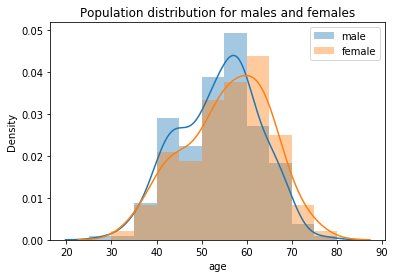

In [16]:
male_df = age_sex_df(df, 0, 100, 1)
female_df = age_sex_df(df, 0, 100, 0)
bins = make_bins_max(df.age, 5)
sns.distplot(male_df.age, bins = bins, label = 'male')
sns.distplot(female_df.age, bins = bins, label = 'female')
plt.legend()
plt.title("Population distribution for males and females")
plt.show()

## b) Histogram with of resting blood presure

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


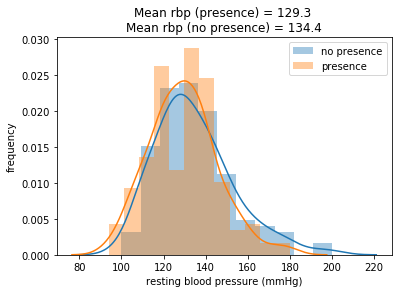

In [17]:
no_presence = (df.loc[(df.trestbps > 0) & (df.target == 0)]).trestbps
presence = (df.loc[(df.trestbps > 0) & (df.target == 1)]).trestbps
mean_np, mean_p = np.around(np.mean(no_presence), 1), np.around(np.mean(presence), 1)
#bins = make_bins_max(df.trestbps, 10)
sns.distplot(no_presence, label = 'no presence')
sns.distplot(presence, label = 'presence')
plt.xlabel('resting blood pressure (mmHg)')
plt.ylabel('frequency')
plt.legend()
plt.title(f"""Mean rbp (presence) = {mean_p} 
Mean rbp (no presence) = {mean_np}""")
plt.show()

## c) Histogram of fasting blood sugar, and chest pain reports
### target 0 = no presence, target 1 = presence of heart disease

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


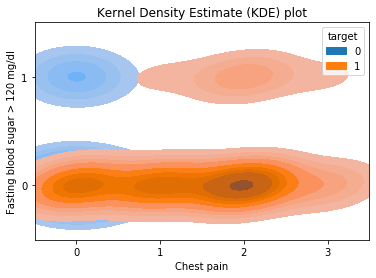

In [18]:
sns.kdeplot(df.cp, df.fbs, fill=True, hue = df.target, alpha = 1, thresh=.1)
plt.xlabel('Chest pain')
plt.ylabel('Fasting blood sugar > 120 mg/dl')
plt.xticks([0,1,2,3])
plt.yticks([0,1])
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5,1.5)
plt.title("Kernel Density Estimate (KDE) plot")
plt.show()

## 2.  Applying a neural network model 
## a) Preprocessing data
#### Check that the data is balanced (same number of target categories 0s and 1s)

In [40]:
sum(df.target)/len(df.target), len(df.target)
# There are more 1s than 0s but not too many.

(0.5445544554455446, 303)

#### Define target and scaled feature arrays

In [20]:
# Separate features and targets into numpy arrays
# scale features using the sklearn preprocessing package
targets = np.array(df.target)
unscaled_features = np.array(df.loc[:, df.columns != 'target'])
scaled_features = preprocessing.scale(unscaled_features)

#### Shuffle the data (targets are currently ordered, 1s first, 0s second)

In [21]:
shuffled_indices = np.arange(scaled_features.shape[0])
np.random.shuffle(shuffled_indices)
# Shuffle by assigninf random index
shuffled_features = scaled_features[shuffled_indices]
shuffled_targets = targets[shuffled_indices]

#### Split data into train, test and validation sets (80:10:10)

In [22]:
sample_counts = shuffled_features.shape[0]
train_counts = int(0.8 * sample_counts)
validation_counts = int(0.1 * sample_counts)
test_counts = sample_counts - train_counts - validation_counts

train_inputs = shuffled_features[:train_counts]
train_targets = shuffled_targets[:train_counts]

validation_inputs = shuffled_features[train_counts:train_counts+validation_counts]
validation_targets = shuffled_targets[train_counts:train_counts+validation_counts]

test_inputs = shuffled_features[train_counts + validation_counts:]
test_targets = shuffled_targets[train_counts + validation_counts:]

#### Save the three datasets in .npz format for TensorFlow

In [23]:
np.savez('heart_train', inputs=train_inputs, targets=train_targets)
np.savez('heart_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('heart_test', inputs=test_inputs, targets=test_targets)

## b) Create ML algorithm

In [41]:
import numpy as np

# Create a class that will do the batching for the algorithm
# This code is extremely reusable. You should just change Audiobooks_data everywhere in the code
class Heart_Data_Reader():
    # Dataset is a mandatory arugment, while the batch_size is optional
    # If you don't input batch_size, it will automatically take the value: None
    def __init__(self, dataset, batch_size = None):
    
        # The dataset that loads is one of "train", "validation", "test".
        # e.g. if I call this class with x('train',5), it will load 'heart_train.npz' with a batch size of 5.
        npz = np.load('heart_{0}.npz'.format(dataset))
        
        # Two variables that take the values of the inputs and the targets. Inputs are floats, targets are integers
        self.inputs, self.targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)
        
        # Counts the batch number, given the size you feed it later
        # If the batch size is None, we are either validating or testing, so we want to take the data in a single batch
        if batch_size is None:
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size
        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size
    
    # A method which loads the next batch
    def __next__(self):
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()
            
        # You slice the dataset in batches and then the "next" function loads them one after the other
        batch_slice = slice(self.curr_batch * self.batch_size, (self.curr_batch + 1) * self.batch_size)
        inputs_batch = self.inputs[batch_slice]
        targets_batch = self.targets[batch_slice]
        self.curr_batch += 1
        
        # One-hot encode the targets. In this example it's a bit superfluous since we have a 0/1 column 
        # as a target already but we're giving you the code regardless, as it will be useful for any 
        # classification task with more than one target column
        classes_num = 2
        targets_one_hot = np.zeros((targets_batch.shape[0], classes_num))
        targets_one_hot[range(targets_batch.shape[0]), targets_batch] = 1
        
        # The function will return the inputs batch and the one-hot encoded targets
        return inputs_batch, targets_one_hot
    
        
    # A method needed for iterating over the batches, as we will put them in a loop
    # This tells Python that the class we're defining is iterable, i.e. that we can use it like:
    # for input, output in data: 
        # do things
    # An iterator in Python is a class with a method __next__ that defines exactly how to iterate through its objects
    def __iter__(self):
        return self

In [83]:
# We need to import TF (we didn't need it so far)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Input size depends on the number of input variables. We have 13 of them
input_size = 13
# Output size is 2, as we one-hot encoded the targets.
output_size = 2
# Choose a hidden_layer_size
hidden_layer_size = 200

# Reset the default graph, so you can fiddle with the hyperparameters and then rerun the code.
tf.reset_default_graph()
#tf.compat.v1.reset_default_graph()

# Create the placeholders
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.int32, [None, output_size])

# Outline the model. We will create a net with 2 hidden layers
weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])
outputs_1 = tf.nn.relu(tf.matmul(inputs, weights_1) + biases_1)

weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2", [hidden_layer_size])
outputs_2 = tf.nn.sigmoid(tf.matmul(outputs_1, weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3", [hidden_layer_size, output_size])
biases_3 = tf.get_variable("biases_3", [output_size])
# We will incorporate the softmax activation into the loss, as in the previous example
outputs = tf.matmul(outputs_2, weights_3) + biases_3

# Use the softmax cross entropy loss with logits
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)
mean_loss = tf.reduce_mean(loss)

# Get a 0 or 1 for every input indicating whether it output the correct answer
out_equals_target = tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1))
accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

# Optimize with Adam
optimize = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(mean_loss)

# Create a session
sess = tf.InteractiveSession()

# Initialize the variables
initializer = tf.global_variables_initializer()
sess.run(initializer)

# Choose the batch size
batch_size = 140

# Set early stopping mechanisms
max_epochs = 1000
prev_validation_loss = 9999999.

# Load the first batch of training and validation, using the class we created. 
# Arguments are ending of 'heart_<...>', where for <...> we input 'train', 'validation', or 'test'
# depending on what we want to load
train_data = Heart_Data_Reader('train', batch_size)
validation_data = Heart_Data_Reader('validation')

validation_loss_list = []
training_loss_list = []
val_acc_list = []

# Create the loop for epochs 
for epoch_counter in range(max_epochs):

    # Set the epoch loss to 0, and make it a float
    curr_epoch_loss = 0.

    # Iterate over the training data 
    # Since train_data is an instance of the Heart_Data_Reader class,
    # we can iterate through it by implicitly using the __next__ method we defined above.
    # As a reminder, it batches samples together, one-hot encodes the targets, and returns
    # inputs and targets batch by batch
    for input_batch, target_batch in train_data:
        _, batch_loss = sess.run([optimize, mean_loss], 
            feed_dict={inputs: input_batch, targets: target_batch})

        #Record the batch loss into the current epoch loss
        curr_epoch_loss += batch_loss

    # Find the mean curr_epoch_loss
    # batch_count is a variable, defined in the Heart_Data_Reader class
    curr_epoch_loss /= train_data.batch_count

    # Set validation loss and accuracy for the epoch to zero
    validation_loss = 0.
    validation_accuracy = 0.

    # Use the same logic of the code to forward propagate the validation set
    # There will be a single batch, as the class was created in this way
    for input_batch, target_batch in validation_data:
        validation_loss, validation_accuracy = sess.run([mean_loss, accuracy],
            feed_dict={inputs: input_batch, targets: target_batch})

    # Print statistics for the current epoch
#     print('Epoch '+str(epoch_counter+1)+
#           '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
#           '. Validation loss: '+'{0:.3f}'.format(validation_loss)+
#           '. Validation accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')

    validation_loss_list.append(validation_loss)
    training_loss_list.append(curr_epoch_loss)
    val_acc_list.append(validation_accuracy)

    # Trigger early stopping if validation loss begins increasing.
    if validation_loss > prev_validation_loss:
        #break
        pass

    # Store this epoch's validation loss to be used as previous in the next iteration.
    prev_validation_loss = validation_loss

print(f'End of training with {batch_size} batches')

/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 140 batches


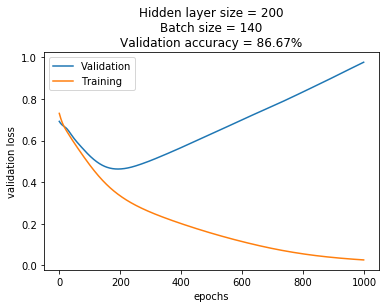

In [84]:
max_val_acc = round(max(val_acc_list)*100,2)

val_x = range(len(validation_loss_list))
val_y = validation_loss_list

train_x = range(len(training_loss_list))
train_y = training_loss_list

plt.plot(val_x, val_y, label = 'Validation')
plt.plot(train_x, train_y, label = 'Training')

plt.xlabel("epochs")
plt.ylabel("validation loss")
plt.legend()
plt.title(f"""Hidden layer size = {hidden_layer_size}
Batch size = {batch_size}
Validation accuracy = {max_val_acc}%""")
plt.show()  

In [68]:
def run_nn(hidden_layer_size, max_epochs, batch_size):

    # Input size depends on the number of input variables. We have 13 of them
    input_size = 13
    # Output size is 2, as we one-hot encoded the targets.
    output_size = 2
    # Choose a hidden_layer_size
    #### Function argument given ####

    # Reset the default graph, so you can fiddle with the hyperparameters and then rerun the code.
    tf.reset_default_graph()
    #tf.compat.v1.reset_default_graph()

    # Create the placeholders
    inputs = tf.placeholder(tf.float32, [None, input_size])
    targets = tf.placeholder(tf.int32, [None, output_size])

    # Outline the model. We will create a net with 2 hidden layers
    weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
    biases_1 = tf.get_variable("biases_1", [hidden_layer_size])
    outputs_1 = tf.nn.relu(tf.matmul(inputs, weights_1) + biases_1)

    weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
    biases_2 = tf.get_variable("biases_2", [hidden_layer_size])
    outputs_2 = tf.nn.sigmoid(tf.matmul(outputs_1, weights_2) + biases_2)

    weights_3 = tf.get_variable("weights_3", [hidden_layer_size, output_size])
    biases_3 = tf.get_variable("biases_3", [output_size])
    # We will incorporate the softmax activation into the loss, as in the previous example
    outputs = tf.matmul(outputs_2, weights_3) + biases_3

    # Use the softmax cross entropy loss with logits
    loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)
    mean_loss = tf.reduce_mean(loss)

    # Get a 0 or 1 for every input indicating whether it output the correct answer
    out_equals_target = tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1))
    accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

    # Optimize with Adam
    optimize = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(mean_loss)

    # Create a session
    sess = tf.InteractiveSession()

    # Initialize the variables
    initializer = tf.global_variables_initializer()
    sess.run(initializer)
    
    # Choose the batch size
    #### Function argument given ####

    # Set early stopping mechanisms
    #### Function argument given ####
    
    prev_validation_loss = 9999999.

    # Load the first batch of training and validation, using the class we created. 
    # Arguments are ending of 'heart_<...>', where for <...> we input 'train', 'validation', or 'test'
    # depending on what we want to load
    train_data = Heart_Data_Reader('train', batch_size)
    validation_data = Heart_Data_Reader('validation')

    validation_loss_list = []
    training_loss_list = []
    val_acc_list = []

    # Create the loop for epochs 
    for epoch_counter in range(max_epochs):

        # Set the epoch loss to 0, and make it a float
        curr_epoch_loss = 0.

        # Iterate over the training data 
        # Since train_data is an instance of the Heart_Data_Reader class,
        # we can iterate through it by implicitly using the __next__ method we defined above.
        # As a reminder, it batches samples together, one-hot encodes the targets, and returns
        # inputs and targets batch by batch
        for input_batch, target_batch in train_data:
            _, batch_loss = sess.run([optimize, mean_loss], 
                feed_dict={inputs: input_batch, targets: target_batch})

            #Record the batch loss into the current epoch loss
            curr_epoch_loss += batch_loss

        # Find the mean curr_epoch_loss
        # batch_count is a variable, defined in the Heart_Data_Reader class
        curr_epoch_loss /= train_data.batch_count

        # Set validation loss and accuracy for the epoch to zero
        validation_loss = 0.
        validation_accuracy = 0.

        # Use the same logic of the code to forward propagate the validation set
        # There will be a single batch, as the class was created in this way
        for input_batch, target_batch in validation_data:
            validation_loss, validation_accuracy = sess.run([mean_loss, accuracy],
                feed_dict={inputs: input_batch, targets: target_batch})

        # Print statistics for the current epoch
    #     print('Epoch '+str(epoch_counter+1)+
    #           '. Training loss: '+'{0:.3f}'.format(curr_epoch_loss)+
    #           '. Validation loss: '+'{0:.3f}'.format(validation_loss)+
    #           '. Validation accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')

        validation_loss_list.append(validation_loss)
        training_loss_list.append(curr_epoch_loss)
        val_acc_list.append(validation_accuracy)


        # Trigger early stopping if validation loss begins increasing.
        if validation_loss > prev_validation_loss:
            #break
            pass

        # Store this epoch's validation loss to be used as previous in the next iteration.
        prev_validation_loss = validation_loss

    print(f'End of training with {hidden_layer_size} hidden layers, {batch_size} batches')
    
#     ########## PLOTTNIG
#     max_val_acc = round(max(val_acc_list)*100,2)

#     val_x = range(len(validation_loss_list))
#     val_y = validation_loss_list

#     train_x = range(len(training_loss_list))
#     train_y = training_loss_list

#     plt.plot(val_x, val_y, label = 'Validation')
#     plt.plot(train_x, train_y, label = 'Training')

#     plt.xlabel("epochs")
#     plt.ylabel("validation loss")
#     plt.legend()
#     plt.title(f"""Hidden layer size = {hidden_layer_size}
#     Batch size = {batch_size}
#     Maximum validation accuracy = {max_val_acc}%""")
#     plt.show()  
    ##############
    
    return training_loss_list, validation_loss_list, val_acc_list

In [69]:
a,b,c = run_nn(200, 2000, 140)

/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 200 hidden layers, 140 batches


In [71]:
def run_many(batch_min, batch_max, step):
    
    
    for i in range(batch_min, batch_max, step):
        training_loss_list, validation_loss_list, val_acc = run_nn(i, 1500, 140)
        max_val_acc = round(max(val_acc)*100,2)
        val_x = range(len(validation_loss_list))
        val_y = validation_loss_list

        train_x = range(len(training_loss_list))
        train_y = training_loss_list
        
        
        plt.plot(val_x,val_y, label = i)
        plt.xlabel("epochs")
        plt.ylabel("validation loss")
        plt.legend()
    plt.title(f"""Validaiton loss for different hidden layer sizes
    max validation accuracy = {max_val_acc}%
    """)
    plt.show()    
        
    

/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 20 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 60 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 100 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 140 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 180 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 220 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 260 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 300 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 340 hidden layers, 140 batches


/Users/Anton/Library/Python/3.8/lib/python/site-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


End of training with 380 hidden layers, 140 batches


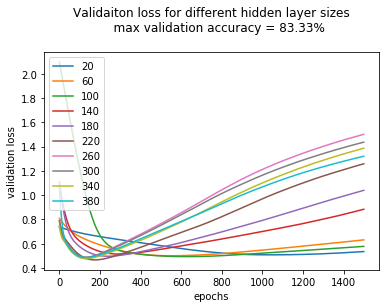

In [74]:
run_many(20, 420, 40)